# Introduction
The purpose of this notebook is to visualize the data we have been working with. Presented images below are a single record from our dataset.

## Load multispectral data

In [31]:
import glob
import os
os.chdir(r"..\..")

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from torch.utils.data import DataLoader
from dataset.dataset_info import ClassifierDatasetInfo
from dataset.dataset_type import DatasetType
from dataset.STARCOP_dataset import STARCOPDataset

dataset = STARCOPDataset(
    data_path=r"data",
    data_type=DatasetType.TEST,
    image_info_class=ClassifierDatasetInfo,
    normalization=False
)

dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
images = next(iter(dataloader))

AVIRIS_data = images[0].squeeze(0)
mag1c = images[1].squeeze(0).squeeze(0)
is_plume = images[2].item()

## Visualization 1 - RGB and MAG1C

RGB


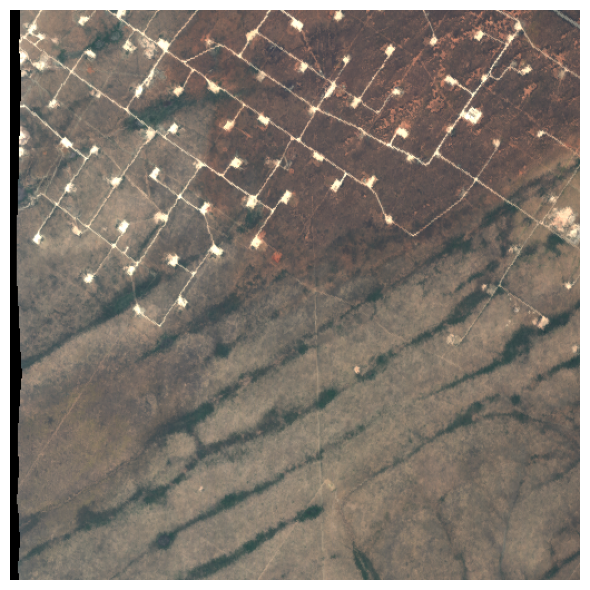

MAG1C


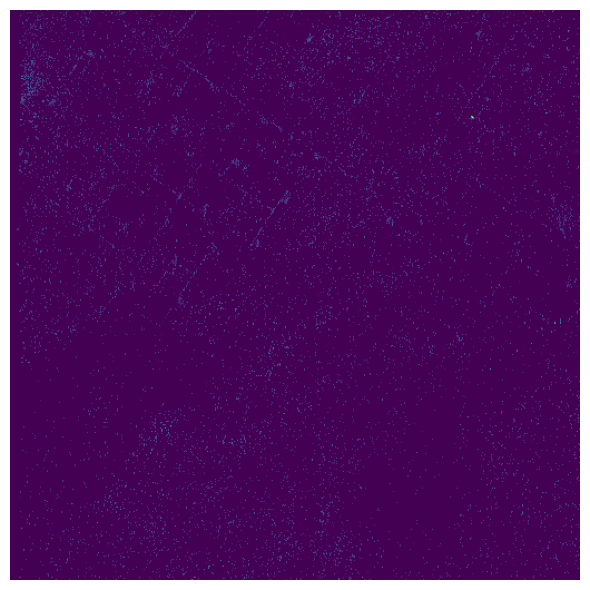

False


In [32]:
print('RGB')
plt.figure(figsize=(8, 6))
r = AVIRIS_data[7, :, :].numpy()
g = AVIRIS_data[6, :, :].numpy()
b = AVIRIS_data[5, :, :].numpy()
image_rgb = np.asarray([r, g, b])
image_rgb = np.clip(image_rgb / 60., 0, 1)
plt.imshow(np.transpose(np.asanyarray(image_rgb), (1, 2, 0)))
plt.axis('off')
plt.tight_layout()
plt.show()

print("MAG1C")
plt.figure(figsize=(8, 6))
image_mag1c = mag1c.numpy()
plt.imshow(image_mag1c)
plt.axis('off')
plt.tight_layout()
plt.show()

print(is_plume)

## Visualization 2 - SWIR

SWIR image 1


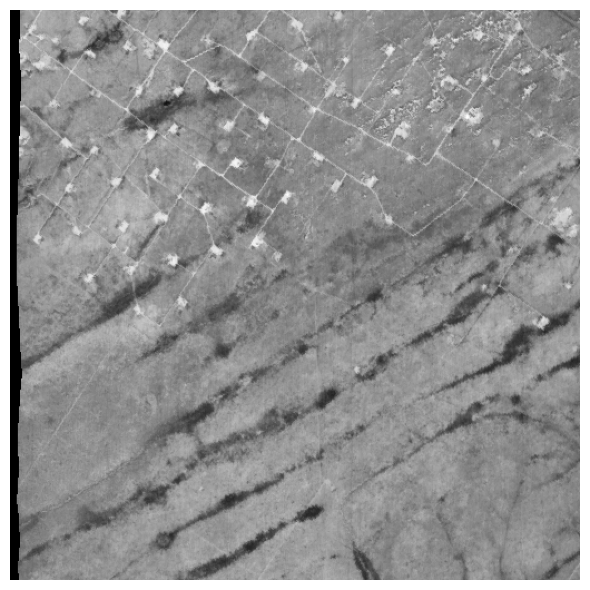

SWIR image 2


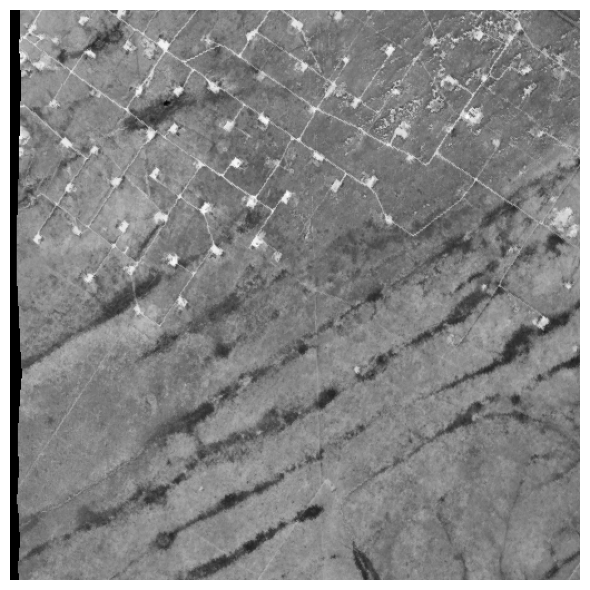

SWIR image 3


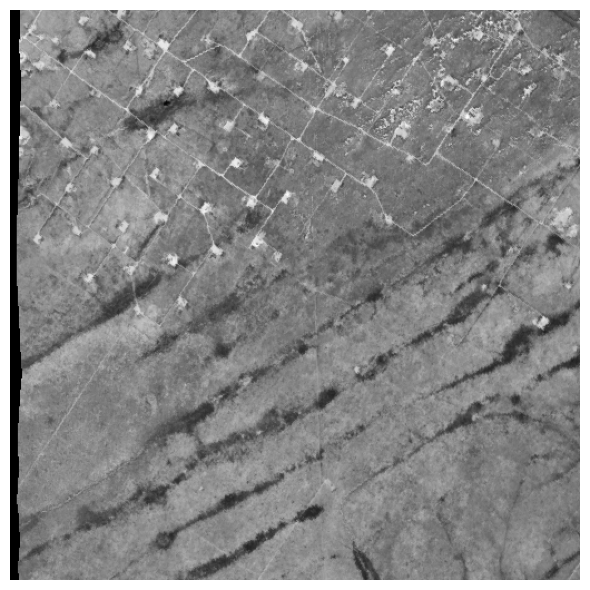

SWIR image 4


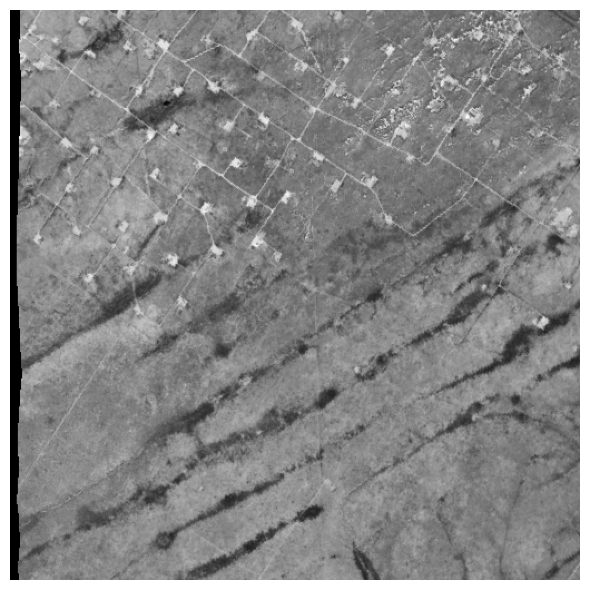

SWIR image 5


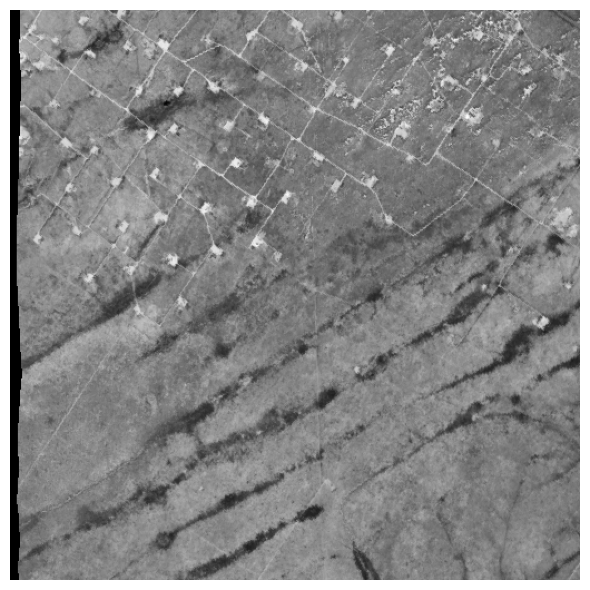

In [33]:
images_swir = AVIRIS_data[:5, :, :]

for i in range(5):
    print(f'SWIR image {i + 1}')
    plt.figure(figsize=(6, 6))
    plt.imshow(images_swir[i, :, :].numpy(), cmap="gray")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## Restore environment

In [34]:
os.chdir(r".\notebooks\tools")